<a href="https://colab.research.google.com/github/jiunny/AID/blob/main/AID_211015_%EB%AA%A8%EB%B2%94%EB%8B%B5%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 1
## 1. 다음의 의사결정 규칙을 결정 트리로 표현하여 보시오.

- 날씨가 흐리면 집안에 있는다.
- 날씨가 맑고 기온이 25도 미만인 경우는 등산을 한다.
- 날씨가 맑고 기온이 25도 이상이면 수영을 하고 30도가 넘으면 영화를 본다.


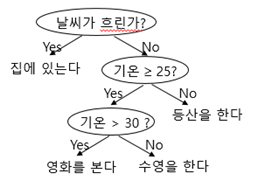

## 2. 낙태 후 불임 가능성을 진단하는 classsification 모델을 작성하고 테스트 하시오.

In [1]:
# Load module
!pip install pydataset
from pydataset import data

from sklearn.tree import DecisionTreeClassifier    
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

     |████████████████████████████████| 15.9 MB 119 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939430 sha256=7dd245a78cc8bd329efa9086aa65d7581dcf1ec759e86f6fe6d06e93015895fe
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [2]:
# Load dataset
data('infert', show_doc=True)  # 데이터 설명보기
data = data('infert')

infert

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Infertility after Spontaneous and Induced Abortion

### Description

This is a matched case-control study dating from before the availability of
conditional logistic regression.

### Usage

    infert

### Format

1\.

Education

0 = 0-5 years

1 = 6-11 years

2 = 12+ years

2\.

age

age in years of case

3\.

parity

count

4\.

number of prior

0 = 0

induced abortions

1 = 1

2 = 2 or more

5\.

case status

1 = case

0 = control

6\.

number of prior

0 = 0

spontaneous abortions

1 = 1

2 = 2 or more

7\.

matched set number

1-83

8\.

stratum number

1-63

### Note

One case with two prior spontaneous abortions and two prior induced abortions
is omitted.

### Source

Trichopoulos _et al_ (1976) _Br. J. of Obst. and Gynaec._ **83**, 645–650.

### Examples

    require(stats)
    model1 <- glm(case ~ spontaneous+induced, data = infert, family = binomial())
    summary(model1)
    #

In [3]:
# Q1 : 데이터셋의 행과 열의 수를 보이시오
data.shape

(248, 8)

In [4]:
# Q2 : 데이터셋의 앞부분 10행의 데이터를 보이시오
data.head(10)

,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
1,0-5yrs,26,6,1,1,2,1,3
2,0-5yrs,42,1,1,1,0,2,1
3,0-5yrs,39,6,2,1,0,3,4
4,0-5yrs,34,4,2,1,0,4,2
5,6-11yrs,35,3,1,1,1,5,32
6,6-11yrs,36,4,2,1,1,6,36
7,6-11yrs,23,1,0,1,0,7,6
8,6-11yrs,32,2,0,1,0,8,22
9,6-11yrs,21,1,0,1,1,9,5
10,6-11yrs,28,2,0,1,0,10,19


In [5]:
# Q3 : 데이터셋의 컬럼(변수) 이름을 보이시오
print(data.columns)

Index(['education', 'age', 'parity', 'induced', 'case', 'spontaneous',
       'stratum', 'pooled.stratum'],
      dtype='object')


In [11]:
# Q4 : 데이터셋을 input variable 부분(X)과 target variable 부분(y)으로 나누시오 
import pandas as pd
data.education = data.education.factorize()[0].astype(float)

X = data.loc[:, data.columns != 'case']
y = data['case']

In [12]:
print(X.head())
print(y.head())

   education  age  parity  induced  spontaneous  stratum  pooled.stratum
1        0.0   26       6        1            2        1               3
2        0.0   42       1        1            0        2               1
3        0.0   39       6        2            0        3               4
4        0.0   34       4        2            0        4               2
5        1.0   35       3        1            1        5              32
1    1
2    1
3    1
4    1
5    1
Name: case, dtype: int64


In [13]:
# Q5 : X, y 를  Train/Test set 으로 나누되 7:3 의 비율로 나누시오
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1) 

In [14]:
print(len(X_train))
print(len(X_test))

173
75


In [15]:
# Q6 : DecisionTreeClassifier 로 진단 모델을 작성하시오 (Train set 이용)
clf = DecisionTreeClassifier(random_state=100)
model = clf.fit(X_train,y_train)

In [16]:
# Q7 : Test set으로 모델의 정확도(accuracy)를 평가하시오.
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6133333333333333


## 3. 데이터셋에 대해 결정트리 모델을 만들고, 다음의 안내를 따라 feature selection 및 parameter tuning을 하시오. (dry_bean.csv)

In [31]:
# Load module
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier    
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV

In [18]:
# Load data
data = pd.read_csv('/content/dry_bean.csv')

In [19]:
# Q1 : 데이터셋의 행과 열의 수를 보이시오
data.shape

(13611, 17)

In [20]:
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [21]:
print(data.columns)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


In [22]:
# Q2 : 데이터셋을 input variable 부분(X)과 target variable 부분(y)으로 나누시오 
X = data.iloc[:,data.columns != "Class"]
y = data["Class"]

In [23]:
# Q3 : X, y 를  Train/Test set 으로 나누되 7:3 의 비율로 나누시오
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                          test_size=0.3, random_state=1)

In [24]:
# Q4 : 결정트리 모델(model_1)을 만들어 성능을 평가하시오.
clf = DecisionTreeClassifier(random_state=2)
model_1 = clf.fit(X_train,y_train)
y_pred = model_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,  y_pred))

Accuracy: 0.8903036238981391


In [29]:
# Q5 : chi2를 이용하여 변수의 중요도를 평가하며, 15개의 변수를 선택하시오.
chY = SelectKBest(chi2, k=15)
X_new = chY.fit_transform(X, y)  # get new data
print(X_new.shape)

column_names = [column[0]  for column in zip(X.columns, chY.get_support()) if column[1]]
print(column_names)

(13611, 15)
['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


In [73]:
# Q6 : Q5에서 선택된 15개의 변수들로 결정트리 모델(model_2)를 다시 세우고, Test 데이터로 성능을 평가하시오.
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(random_state=2)
model_2 = clf.fit(X_train,y_train)
y_pred2 = model_2.predict(X_test)

print("Accuracy model2:",metrics.accuracy_score(y_test, y_pred2))

Accuracy model2: 0.8929970617042116


In [74]:
# Q7 : Q5 에서 선택된 변수로 구성된 데이터에 대해 gridsearchcv로 결정트리의 최적의 파라미터를 찾고, 
# 해당 파라미터로 결정트리(model_3)를 만들어 성능을 평가하시오.
clf = DecisionTreeClassifier(random_state=2)

parameters = {'max_depth': [3, 5, 10],
              'min_samples_split': [4, 5, 6],
              'splitter': ['best', 'random'],
              'min_samples_leaf': [5,7,9]}

grid_dt = GridSearchCV(clf, param_grid = parameters, cv = 5) # 교차검증 5개

grid_dt.fit(X_new, y)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_leaf,min_samples_split,splitter,mean_test_score
27,5,7,5,random,0.748449
29,5,7,6,random,0.748449
25,5,7,4,random,0.748449
19,5,5,4,random,0.737281
23,5,5,6,random,0.737281
21,5,5,5,random,0.737281
35,5,9,6,random,0.725895
33,5,9,5,random,0.725895
31,5,9,4,random,0.725895
51,10,9,5,random,0.712895


In [75]:
# Q7 : 성능평가
clf = DecisionTreeClassifier(random_state=2, 
           max_depth=5, min_samples_split=5, min_samples_leaf=7,splitter="random")
model_3 = clf.fit(X_train,y_train)
y_pred3 = model_3.predict(X_test)

print("Accuracy model3:",metrics.accuracy_score(y_test, y_pred3))

Accuracy model3: 0.8731635651322233


In [76]:
y_test.value_counts()

DERMASON    1062
SIRA         800
SEKER        621
HOROZ        579
CALI         479
BARBUNYA     390
BOMBAY       153
Name: Class, dtype: int64

In [77]:
result['std_test_score'] = grid_dt.cv_results_['std_test_score']
result.sort_values(by='std_test_score', ascending=False)

,max_depth,min_samples_leaf,min_samples_split,splitter,mean_test_score,std_test_score
20,5,5,5,best,0.623840,0.224711
22,5,5,6,best,0.623840,0.224711
18,5,5,4,best,0.623840,0.224711
32,5,9,5,best,0.682767,0.222621
30,5,9,4,best,0.682767,0.222621
34,5,9,6,best,0.682767,0.222621
28,5,7,6,best,0.682693,0.222597
26,5,7,5,best,0.682693,0.222597
24,5,7,4,best,0.682693,0.222597
52,10,9,6,best,0.651689,0.208222


## 4. unit31_1.py 를 참조하여, 제공된 데이터셋에 대해 simple voting 방법으로 다음 안내에 따라 모델을 만들고 성능을 평가하시오.

In [78]:
# Load module 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [79]:
# Load data
data = pd.read_csv('/content/dry_bean.csv')

In [80]:
# Q1 : 데이터셋을 input variable 부분(X)과 target variable 부분(y)으로 나누시오. 
X = data.iloc[:,data.columns != "Class"]
y = data["Class"]

In [81]:
# Q2 : X, y 를 Train/Test set 으로 나누되 7:3 의 비율로 나누시오. (random_state = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [82]:
# Q3 : LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier 3개의 모델을 각각 만들고 
# 각 모델들의 성능을 평가하시오. (random_state=2, n_neighbors=1)
clf_lr = LogisticRegression()
clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_dt = DecisionTreeClassifier(random_state=2)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

models = [clf_lr, clf_knn, clf_dt]
for model in models:
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    model_name = model.__class__.__name__
    print(f"{model_name} \t : {accuracy_score(y_test, pred_y)}") 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 	 : 0.9236043095004897
KNeighborsClassifier 	 : 0.9037708129285015
DecisionTreeClassifier 	 : 0.8903036238981391


In [83]:
# Q4 : Q3에서의 3개의 모델을 앙상블하여 soft voting 방식으로 test 데이터를 예측하여 성능을 평가하시오.
# Define voting classifer
clf_voting = VotingClassifier(estimators=[('LR', clf_lr),
                                        ('KNN', clf_knn),
                                        ('DT', clf_dt)],voting='soft')
clf_voting.fit(X_train, y_train)
pred_y = clf_voting.predict(X_test)
print('Voting accuracy', accuracy_score(y_test, pred_y))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Voting accuracy 0.92384916748286


# 실습 2
## 1. 제공된 데이터셋에 대해 분류(classification) 모델을 만들고 성능을 평가 하시오.

In [128]:
# Load module
from pprint import pprint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_breast_cancer

In [129]:
# Load data
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)       # (569, 30)

(569, 30)


In [139]:
# Q1 : X, y 를 Train/Test set 으로 나누되 7:3 의 비율로 나누시오. (random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [140]:
# Q2 : KNN, SVM, Random Forest 모델을 각각 구축하고, 모델 성능을 평가하시오. (필요시 표준화) 
clf_knn = KNeighborsClassifier()
clf_svm = svm.SVC()
clf_rf = RandomForestClassifier(random_state=100)

# standarize 
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# test KNN
model = clf_knn.fit(X_train_sc,y_train)
y_pred = model.predict(X_test_sc)
print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))  # 0.96

# test SVM
model = clf_svm.fit(X_train_sc,y_train)
y_pred = model.predict(X_test_sc)
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred))  # 0.97

# test Random Forest
model = clf_rf.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("RF Accuracy:",metrics.accuracy_score(y_test, y_pred))   # 0.9590

KNN Accuracy: 0.9590643274853801
SVM Accuracy: 0.9707602339181286
RF Accuracy: 0.9590643274853801


In [142]:
# Q3 : 각 모델들에 대해 chi2를 이용하여 적절한 변수를 선택하고 각 모델의 성능을 평가하시오.

# knn
for i in range(2,X.shape[1]+1):
    X_new = SelectKBest(chi2, k=i).fit_transform(X,y) # i개의 변수 선택
    X_new_sc = StandardScaler().fit_transform(X_new) # 선택된 변수 데이터 표준화
    scores = cross_val_score(clf_knn, X_new_sc, y, cv=5)
    print(i, "Mean Accuracy:", scores.mean()) #25

2 Mean Accuracy: 0.924406148113647
3 Mean Accuracy: 0.9262071106970968
4 Mean Accuracy: 0.9367955286446203
5 Mean Accuracy: 0.9350256171401956
6 Mean Accuracy: 0.9280080732805466
7 Mean Accuracy: 0.9315168452103709
8 Mean Accuracy: 0.9209905294208973
9 Mean Accuracy: 0.9262381617761216
10 Mean Accuracy: 0.929762459245459
11 Mean Accuracy: 0.9455364073901567
12 Mean Accuracy: 0.9473218444340941
13 Mean Accuracy: 0.947290793355069
14 Mean Accuracy: 0.9543393882937432
15 Mean Accuracy: 0.9578326346840551
16 Mean Accuracy: 0.9578326346840551
17 Mean Accuracy: 0.9560627231796305
18 Mean Accuracy: 0.9543238627542306
19 Mean Accuracy: 0.9578326346840551
20 Mean Accuracy: 0.9648657040832168
21 Mean Accuracy: 0.968390001552554
22 Mean Accuracy: 0.9718832479428661
23 Mean Accuracy: 0.968390001552554
24 Mean Accuracy: 0.9701288619779538
25 Mean Accuracy: 0.9754075454122031
26 Mean Accuracy: 0.9701288619779538
27 Mean Accuracy: 0.971883247942866
28 Mean Accuracy: 0.9683744760130415
29 Mean Accurac

In [143]:
# Find selected feature name : knn
chY_knn = SelectKBest(chi2, k=25)    # please test other k value
X_new_knn = chY_knn.fit_transform(X, y)  # get new data (feature selected) 
column_id = [column[0]  for column in zip(range(0,30), chY_knn.get_support()) if column[1]]
print(column_id)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [144]:
# svm
for i in range(2,X.shape[1]+1):
    X_new = SelectKBest(chi2, k=i).fit_transform(X,y) # i개의 변수 선택
    X_new_sc = StandardScaler().fit_transform(X_new) # 선택된 변수 데이터 표준화
    scores = cross_val_score(clf_svm, X_new_sc, y, cv=5)
    print(i, "Mean Accuracy:", scores.mean()) #23

2 Mean Accuracy: 0.9227293898462972
3 Mean Accuracy: 0.9262071106970968
4 Mean Accuracy: 0.9332712311752832
5 Mean Accuracy: 0.9315168452103709
6 Mean Accuracy: 0.9262536873156341
7 Mean Accuracy: 0.9297624592454585
8 Mean Accuracy: 0.9315168452103709
9 Mean Accuracy: 0.9455519329296692
10 Mean Accuracy: 0.9455519329296692
11 Mean Accuracy: 0.95960254618848
12 Mean Accuracy: 0.9560937742586555
13 Mean Accuracy: 0.9543549138332557
14 Mean Accuracy: 0.9578636857630801
15 Mean Accuracy: 0.9666356155876417
16 Mean Accuracy: 0.9683900015525537
17 Mean Accuracy: 0.9701443875174661
18 Mean Accuracy: 0.9701288619779538
19 Mean Accuracy: 0.9718987734823784
20 Mean Accuracy: 0.9736531594472908
21 Mean Accuracy: 0.9754075454122031
22 Mean Accuracy: 0.9754075454122031
23 Mean Accuracy: 0.9771774569166277
24 Mean Accuracy: 0.9736531594472908
25 Mean Accuracy: 0.9754230709517155
26 Mean Accuracy: 0.9683744760130415
27 Mean Accuracy: 0.9718987734823784
28 Mean Accuracy: 0.9754075454122031
29 Mean Acc

In [145]:
# Find selected feature name : svm
chY_svm = SelectKBest(chi2, k=23)    # please test other k value
X_new_svm = chY_svm.fit_transform(X, y)  # get new data (feature selected) 
column_id = [column[0]  for column in zip(range(0,30), chY_svm.get_support()) if column[1]]
print(column_id)

[0, 1, 2, 3, 5, 6, 7, 8, 10, 12, 13, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [146]:
# random forest
for i in range(2,X.shape[1]+1):
    X_new = SelectKBest(chi2, k=i).fit_transform(X,y)
    scores = cross_val_score(clf_rf, X_new, y, cv=5)
    print(i, "Mean Accuracy:", scores.mean()) # 17

2 Mean Accuracy: 0.9174041297935103
3 Mean Accuracy: 0.9156963204471354
4 Mean Accuracy: 0.9420586865393572
5 Mean Accuracy: 0.9315168452103709
6 Mean Accuracy: 0.9385499146095327
7 Mean Accuracy: 0.9297469337059463
8 Mean Accuracy: 0.9280080732805466
9 Mean Accuracy: 0.9367489520260829
10 Mean Accuracy: 0.9420276354603322
11 Mean Accuracy: 0.9490762303990063
12 Mean Accuracy: 0.9490762303990063
13 Mean Accuracy: 0.9490762303990063
14 Mean Accuracy: 0.9561092997981679
15 Mean Accuracy: 0.9525694767893185
16 Mean Accuracy: 0.9613724576929048
17 Mean Accuracy: 0.9666511411271541
18 Mean Accuracy: 0.9596180717279925
19 Mean Accuracy: 0.9631268436578171
20 Mean Accuracy: 0.9631423691973297
21 Mean Accuracy: 0.9613724576929048
22 Mean Accuracy: 0.9578481602235677
23 Mean Accuracy: 0.9543393882937432
24 Mean Accuracy: 0.9596180717279925
25 Mean Accuracy: 0.9648657040832168
26 Mean Accuracy: 0.9631268436578171
27 Mean Accuracy: 0.9666356155876418
28 Mean Accuracy: 0.9578636857630801
29 Mean A

In [147]:
# Find selected feature name : rf
chY = SelectKBest(chi2, k=17)    # please test other k value 
X_new = chY.fit_transform(X, y)  # get new data (feature selected) 
column_id = [column[0]  for column in zip(range(0,30), chY.get_support()) if column[1]]
print(column_id)

[0, 1, 2, 3, 5, 6, 7, 10, 12, 13, 20, 21, 22, 23, 25, 26, 27]


In [148]:
# train_test split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_new_knn, y, test_size=0.3, random_state=1)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_new_svm, y, test_size=0.3, random_state=1)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_new, y, test_size=0.3, random_state=1)

In [149]:
print(X_train_knn.shape)
print(X_train_svm.shape)
print(X_train_rf.shape)

(398, 25)
(398, 23)
(398, 17)


In [150]:
# predict
scaler_knn = StandardScaler().fit(X_train_knn)
scaler_svm = StandardScaler().fit(X_train_svm)

X_train_knn = scaler_knn.transform(X_train_knn)
X_test_knn = scaler_knn.transform(X_test_knn)
X_train_svm = scaler_svm.transform(X_train_svm)
X_test_svm = scaler_svm.transform(X_test_svm)

# test KNN
model = clf_knn.fit(X_train_knn,y_train)
y_pred_knn = model.predict(X_test_knn)
print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))  # 0.9532

# test SVM
model = clf_svm.fit(X_train_svm,y_train)
y_pred_svm = model.predict(X_test_svm)
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))  # 0.9707

# test Random Forest
model = clf_rf.fit(X_train_rf,y_train)
y_pred_rf = model.predict(X_test_rf)
print("RF Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))   # 0.9649

KNN Accuracy: 0.9532163742690059
SVM Accuracy: 0.9707602339181286
RF Accuracy: 0.9649122807017544


In [61]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# test KNN
model = clf_knn.fit(X_train_sc,y_train)
y_pred = model.predict(X_test_sc)
print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))  # 0.9298

KNN Accuracy: 0.9649122807017544


In [151]:
# Q4 : 각 모델들의 최적의 파라미터를 찾고, 각 모델의 성능을 평가하시오.
from sklearn.model_selection import GridSearchCV

# KNN 
n_neighbors = [1, 3, 5, 7]
weights = ['uniform', 'distance']

dic_grid = {'n_neighbors': n_neighbors,
            'weights': weights}
pprint(dic_grid)

# Parameter tuning (takes long time)
knn_grid = GridSearchCV(estimator = clf_knn, param_grid = dic_grid, 
                                cv = 3, verbose=2)
# Fit the grid search model
X_new_knn_sc = StandardScaler().fit_transform(X_new_knn)
knn_grid.fit(X_new_knn_sc, y)
pprint(knn_grid.best_params_)


{'n_neighbors': [1, 3, 5, 7], 'weights': ['uniform', 'distance']}
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] .................. n_neighbors=1, weights=distance, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] .................. n_neighbors=1, weights=distance, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] .................. n_neighbors=1, weights=distance, total=   0.0s
[CV] n_neighbors=3, we

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
{'n_neighbors': 3, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished


In [159]:
# test model
clf_knn_tuned =KNeighborsClassifier(n_neighbors=3, weights= "uniform")
model = clf_knn_tuned.fit(X_train_knn,y_train)
y_pred_knn = model.predict(X_test_knn)
print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))  # 0.9590

KNN Accuracy: 0.9590643274853801


In [154]:
# svm
kernel=['linear', 'sigmoid',  'rbf']
C = [1, 5, 10]

dic_grid = {'kernel': kernel, 'C': C}
pprint(dic_grid)

# Parameter tuning (takes long time)
svm_grid = GridSearchCV(estimator = clf_svm, param_grid = dic_grid, 
                                    cv = 3, verbose=2)
# Fit the grid search model
X_new_svm_sc = StandardScaler().fit_transform(X_new_svm)
svm_grid.fit(X_new_svm_sc, y)
pprint(svm_grid.best_params_)

# svm_grid.fit(X_train_svm, y)
# pprint(svm_grid.best_params_)

{'C': [1, 5, 10], 'kernel': ['linear', 'sigmoid', 'rbf']}
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=   0.0s
[CV] C=1, kernel=rbf .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s finished


In [160]:
# test model
clf_svm_tuned = svm.SVC(C=1, kernel= "rbf") # default parameter와 동일
model = clf_svm_tuned.fit(X_train_svm,y_train)
y_pred_svm = model.predict(X_test_svm)
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.9707602339181286


In [161]:
# Random Forest 
n_estimators = [100, 500, 1000, 1500, 2000]

dic_grid = {'n_estimators': n_estimators}
pprint(dic_grid)

# Parameter tuning (takes long time)
rf_grid = GridSearchCV(estimator = clf_rf, param_grid = dic_grid, 
                                   cv = 3, verbose=2)
# Fit the random search model
rf_grid.fit(X_new, y)
pprint(rf_grid.best_params_)

{'n_estimators': [100, 500, 1000, 1500, 2000]}
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................. n_estimators=100, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.2s
[CV] n_estimators=500 ................................................
[CV] ................................. n_estimators=500, total=   0.9s
[CV] n_estimators=500 ................................................
[CV] ................................. n_estimators=500, total=   0.9s
[CV] n_estimators=500 ................................................
[CV] ................................. n_estimators=500, total=   0.9s
[CV] n_estimators=1000 ...............................................
[CV] ................................ n_estimators=1000, total=   1.8s
[CV] n_estimators=1000 ...............................................
[CV] ................................ n_estimators=1000, total=   1.9s
[CV] n_estimators=1000 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   27.3s finished


{'n_estimators': 500}


In [163]:
# Test tuned model #
clf_rf_tuned = RandomForestClassifier(random_state=100,n_estimators=500)

model = clf_rf_tuned.fit(X_train_rf,y_train)
y_pred_rf = model.predict(X_test_rf)
print("RF Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))  # 0.9649

RF Accuracy: 0.9649122807017544


In [164]:
print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))  # 0.9590
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("RF Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))  # 0.9649

KNN Accuracy: 0.9590643274853801
SVM Accuracy: 0.9707602339181286
RF Accuracy: 0.9649122807017544


In [168]:
# Q5 : 구축한 3개의 모델을 hard voting 방식으로 앙상블하여 모델의 성능을 평가하시오.
from sklearn.ensemble import VotingClassifier

# hard voting classifier
clf_voting = VotingClassifier(estimators=[('KNN', clf_knn_tuned),
                                        ('SVM', clf_svm_tuned),
                                        ('RF', clf_rf_tuned)],
                              voting='hard')

# Test voting classifer
clf_voting.fit(X_train, y_train)
pred_y = clf_voting.predict(X_test)
print('Voting accuracy', metrics.accuracy_score(y_test, pred_y))


Voting accuracy 0.9415204678362573


In [ ]:
# best model : random forest
# 최고의 성능을 내면서 복잡하지 않은 모델